In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn.functional as F
torch.manual_seed(42)

from torch.utils.data import DataLoader, TensorDataset

# from model0 import Model0
# from model1 import Model1
# from model2 import Model2

from model0_cross_entropy import Model0
from model1_cross_entropy import Model1
from model2_cross_entropy import Model2

In [2]:
from config import batch_size

In [3]:
Y_func = lambda x : (torch.sin(5*torch.pi*x)) /(5*torch.pi*x) 

In [4]:
num_of_rows = 300

In [5]:
X= torch.unsqueeze(torch.linspace(-1,1,num_of_rows),dim=1)
Y = Y_func(X)


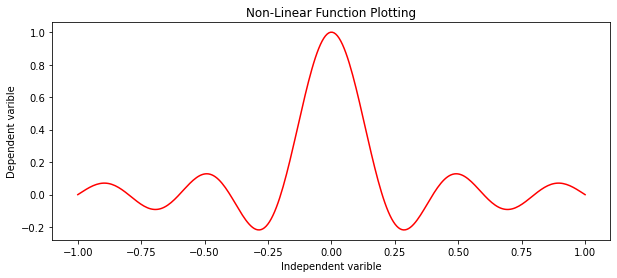

In [6]:
plt.figure(figsize=(10,4))
plt.plot(X, Y, color = "red")
plt.title('Non-Linear Function Plotting')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('func1_plot.png')

In [7]:
X.shape

torch.Size([300, 1])

In [8]:
dataset = TensorDataset(X,Y)
data_loader = DataLoader(dataset,1,shuffle=True)

In [9]:
model_0 = Model0()
model_1 = Model1()
model_2 = Model2()

In [10]:
lr = 0.0004
gamma_lr_scheduler = 0.1 
weight_decay = 1e-4


In [11]:
def get_criterion_optimizer_schedular(model,lr,gamma,weight_decay):
    criterion = nn.CrossEntropyLoss()
    
    optimizer = optim.Adam(model.parameters(), lr=lr,weight_decay=weight_decay)
    
    exp_lr_scheduler = lr_scheduler.StepLR(
    optimizer, step_size=10, gamma=gamma_lr_scheduler
    )
    
    return criterion,optimizer,exp_lr_scheduler

In [12]:
criterion,optimizer,scheduler = get_criterion_optimizer_schedular(model_0,lr,gamma_lr_scheduler,weight_decay)

In [13]:
# v1

# def evaluate(model, val_loader):
#     outputs = [model.validation_step(batch) for batch in val_loader]
#     return model.validation_epoch_end(outputs)

# def evaluate2(model, train_loader):
#     outputs = [model.train_step(batch) for batch in train_loader]
#     return model.train_epoch_end(outputs)

# def fit(epochs, lr, model, data_loader, criterion,opt_func=torch.optim.SGD):
#     history = []
# #     train_history = []
#     optimizer = opt_func(model.parameters(), lr)
#     for epoch in range(epochs):
#         # Training Phase 
#         for batch in data_loader:
#             loss = model.training_step(batch)
#             loss.backward()
#             optimizer.step()
#             optimizer.zero_grad()
#         # Validation phase
#         result = evaluate(model, data_loader)
#         model.epoch_end(epoch, result)
#         history.append(result)
# #         res2 = evaluate2(model,train_loader)
# #         train_history.append(res2)
#     return history

In [14]:
# v1

# result_0 = evaluate(model_0,data_loader)
# result_1 = evaluate(model_1,data_loader)
# result_2 = evaluate(model_2,data_loader)

# result_0,result_1,result_2

In [15]:
# v1

# print("MODEL 0")
# history_0 = fit(2000, lr, model_0, data_loader,criterion)
# print("MODEL 1")
# history_1  = fit(2000, lr, model_1, data_loader, criterion)
# print("MODEL 2")
# history_2  = fit(2000, lr, model_2, data_loader, criterion)

In [16]:
# v2
def evaluate(model,loss_fn, val_loader):
    outputs = [model.validation_step(batch,loss_fn) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def evaluate2(model,loss_fn, train_loader):
    outputs = [model.train_step(batch,loss_fn) for batch in train_loader]
    return model.train_epoch_end(outputs)

def get_grad_norm(model):
    grad_all=0.0
    grad =0
    
    for p in model.parameters():
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy()**2).sum()
            
        grad_all+=grad
        
    grad_norm=grad_all ** 0.5
    return grad_norm


def fit(epochs, lr, model, data_loader, criterion,opt_func):
    history = []
    grad_norm_per_epoch={}
#     train_history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in data_loader:
            loss = model.training_step(batch,criterion)
            loss.backward()
            optimizer.step()
            grad_norm_per_epoch[epoch] = get_grad_norm(model)
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model,criterion, data_loader)
        model.epoch_end(epoch, result)
        history.append(result)
#         res2 = evaluate2(model,train_loader)
#         train_history.append(res2)
    return history,grad_norm_per_epoch

In [17]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam
num_epochs =5000
criterion_name = "MSE_LOSS_"
optimizer_name = "ADAM_opt"

In [18]:
filename = criterion_name+ optimizer_name+".png"
filename

'MSE_LOSS_ADAM_opt.png'

In [19]:
# criterion = [nn.MSELoss()]
# optimizer = [torch.optim.Adam]
# num_epochs =2000
# criterion_name = ["MSE_LOSS"]
# optimizer_name = ["ADAM_opt"]

In [20]:
result_0 = evaluate(model_0,criterion,data_loader)
result_1 = evaluate(model_1,criterion,data_loader)
result_2 = evaluate(model_2,criterion,data_loader)

result_0,result_1,result_2

({'val_loss': 0.22771821916103363},
 {'val_loss': 0.20846916735172272},
 {'val_loss': 0.09984073787927628})

In [21]:
print("MODEL 0")
history_0,g0 = fit(num_epochs, lr, model_0, data_loader,criterion,optimizer)
print("MODEL 1")
history_1,g1  = fit(num_epochs, lr, model_1, data_loader, criterion,optimizer)
print("MODEL 2")
history_2 ,g2 = fit(num_epochs, lr, model_2, data_loader, criterion,optimizer)

MODEL 0
Epoch [0], val_loss: 0.1615
Epoch [1], val_loss: 0.0876
Epoch [2], val_loss: 0.0878
Epoch [3], val_loss: 0.0874
Epoch [4], val_loss: 0.0873
Epoch [5], val_loss: 0.0875
Epoch [6], val_loss: 0.0874
Epoch [7], val_loss: 0.0872
Epoch [8], val_loss: 0.0874
Epoch [9], val_loss: 0.0872
Epoch [10], val_loss: 0.0872
Epoch [11], val_loss: 0.0871
Epoch [12], val_loss: 0.0873
Epoch [13], val_loss: 0.0871
Epoch [14], val_loss: 0.0871
Epoch [15], val_loss: 0.0871
Epoch [16], val_loss: 0.0873
Epoch [17], val_loss: 0.0871
Epoch [18], val_loss: 0.0871
Epoch [19], val_loss: 0.0871
Epoch [20], val_loss: 0.0871
Epoch [21], val_loss: 0.0870
Epoch [22], val_loss: 0.0871
Epoch [23], val_loss: 0.0871
Epoch [24], val_loss: 0.0871
Epoch [25], val_loss: 0.0872
Epoch [26], val_loss: 0.0870
Epoch [27], val_loss: 0.0870
Epoch [28], val_loss: 0.0870
Epoch [29], val_loss: 0.0875
Epoch [30], val_loss: 0.0870
Epoch [31], val_loss: 0.0870
Epoch [32], val_loss: 0.0871
Epoch [33], val_loss: 0.0869
Epoch [34], val_

Epoch [277], val_loss: 0.0075
Epoch [278], val_loss: 0.0073
Epoch [279], val_loss: 0.0081
Epoch [280], val_loss: 0.0073
Epoch [281], val_loss: 0.0072
Epoch [282], val_loss: 0.0075
Epoch [283], val_loss: 0.0076
Epoch [284], val_loss: 0.0074
Epoch [285], val_loss: 0.0073
Epoch [286], val_loss: 0.0074
Epoch [287], val_loss: 0.0077
Epoch [288], val_loss: 0.0072
Epoch [289], val_loss: 0.0076
Epoch [290], val_loss: 0.0072
Epoch [291], val_loss: 0.0076
Epoch [292], val_loss: 0.0086
Epoch [293], val_loss: 0.0074
Epoch [294], val_loss: 0.0074
Epoch [295], val_loss: 0.0072
Epoch [296], val_loss: 0.0086
Epoch [297], val_loss: 0.0076
Epoch [298], val_loss: 0.0073
Epoch [299], val_loss: 0.0071
Epoch [300], val_loss: 0.0073
Epoch [301], val_loss: 0.0073
Epoch [302], val_loss: 0.0073
Epoch [303], val_loss: 0.0072
Epoch [304], val_loss: 0.0080
Epoch [305], val_loss: 0.0075
Epoch [306], val_loss: 0.0073
Epoch [307], val_loss: 0.0072
Epoch [308], val_loss: 0.0072
Epoch [309], val_loss: 0.0072
Epoch [310

Epoch [551], val_loss: 0.0070
Epoch [552], val_loss: 0.0072
Epoch [553], val_loss: 0.0070
Epoch [554], val_loss: 0.0070
Epoch [555], val_loss: 0.0069
Epoch [556], val_loss: 0.0073
Epoch [557], val_loss: 0.0071
Epoch [558], val_loss: 0.0076
Epoch [559], val_loss: 0.0069
Epoch [560], val_loss: 0.0069
Epoch [561], val_loss: 0.0071
Epoch [562], val_loss: 0.0071
Epoch [563], val_loss: 0.0071
Epoch [564], val_loss: 0.0070
Epoch [565], val_loss: 0.0069
Epoch [566], val_loss: 0.0069
Epoch [567], val_loss: 0.0070
Epoch [568], val_loss: 0.0070
Epoch [569], val_loss: 0.0068
Epoch [570], val_loss: 0.0068
Epoch [571], val_loss: 0.0069
Epoch [572], val_loss: 0.0068
Epoch [573], val_loss: 0.0074
Epoch [574], val_loss: 0.0073
Epoch [575], val_loss: 0.0068
Epoch [576], val_loss: 0.0072
Epoch [577], val_loss: 0.0068
Epoch [578], val_loss: 0.0068
Epoch [579], val_loss: 0.0072
Epoch [580], val_loss: 0.0067
Epoch [581], val_loss: 0.0072
Epoch [582], val_loss: 0.0071
Epoch [583], val_loss: 0.0067
Epoch [584

Epoch [825], val_loss: 0.0072
Epoch [826], val_loss: 0.0068
Epoch [827], val_loss: 0.0070
Epoch [828], val_loss: 0.0068
Epoch [829], val_loss: 0.0068
Epoch [830], val_loss: 0.0068
Epoch [831], val_loss: 0.0070
Epoch [832], val_loss: 0.0071
Epoch [833], val_loss: 0.0069
Epoch [834], val_loss: 0.0069
Epoch [835], val_loss: 0.0068
Epoch [836], val_loss: 0.0069
Epoch [837], val_loss: 0.0073
Epoch [838], val_loss: 0.0079
Epoch [839], val_loss: 0.0068
Epoch [840], val_loss: 0.0070
Epoch [841], val_loss: 0.0069
Epoch [842], val_loss: 0.0069
Epoch [843], val_loss: 0.0069
Epoch [844], val_loss: 0.0069
Epoch [845], val_loss: 0.0071
Epoch [846], val_loss: 0.0071
Epoch [847], val_loss: 0.0068
Epoch [848], val_loss: 0.0068
Epoch [849], val_loss: 0.0068
Epoch [850], val_loss: 0.0067
Epoch [851], val_loss: 0.0067
Epoch [852], val_loss: 0.0068
Epoch [853], val_loss: 0.0068
Epoch [854], val_loss: 0.0069
Epoch [855], val_loss: 0.0068
Epoch [856], val_loss: 0.0069
Epoch [857], val_loss: 0.0068
Epoch [858

Epoch [1095], val_loss: 0.0052
Epoch [1096], val_loss: 0.0050
Epoch [1097], val_loss: 0.0047
Epoch [1098], val_loss: 0.0051
Epoch [1099], val_loss: 0.0048
Epoch [1100], val_loss: 0.0051
Epoch [1101], val_loss: 0.0047
Epoch [1102], val_loss: 0.0046
Epoch [1103], val_loss: 0.0049
Epoch [1104], val_loss: 0.0049
Epoch [1105], val_loss: 0.0047
Epoch [1106], val_loss: 0.0046
Epoch [1107], val_loss: 0.0074
Epoch [1108], val_loss: 0.0054
Epoch [1109], val_loss: 0.0048
Epoch [1110], val_loss: 0.0046
Epoch [1111], val_loss: 0.0047
Epoch [1112], val_loss: 0.0049
Epoch [1113], val_loss: 0.0047
Epoch [1114], val_loss: 0.0048
Epoch [1115], val_loss: 0.0054
Epoch [1116], val_loss: 0.0046
Epoch [1117], val_loss: 0.0047
Epoch [1118], val_loss: 0.0053
Epoch [1119], val_loss: 0.0061
Epoch [1120], val_loss: 0.0050
Epoch [1121], val_loss: 0.0048
Epoch [1122], val_loss: 0.0048
Epoch [1123], val_loss: 0.0064
Epoch [1124], val_loss: 0.0061
Epoch [1125], val_loss: 0.0047
Epoch [1126], val_loss: 0.0047
Epoch [1

Epoch [1360], val_loss: 0.0040
Epoch [1361], val_loss: 0.0041
Epoch [1362], val_loss: 0.0045
Epoch [1363], val_loss: 0.0040
Epoch [1364], val_loss: 0.0040
Epoch [1365], val_loss: 0.0041
Epoch [1366], val_loss: 0.0041
Epoch [1367], val_loss: 0.0047
Epoch [1368], val_loss: 0.0040
Epoch [1369], val_loss: 0.0040
Epoch [1370], val_loss: 0.0041
Epoch [1371], val_loss: 0.0042
Epoch [1372], val_loss: 0.0043
Epoch [1373], val_loss: 0.0039
Epoch [1374], val_loss: 0.0041
Epoch [1375], val_loss: 0.0040
Epoch [1376], val_loss: 0.0040
Epoch [1377], val_loss: 0.0040
Epoch [1378], val_loss: 0.0045
Epoch [1379], val_loss: 0.0040
Epoch [1380], val_loss: 0.0042
Epoch [1381], val_loss: 0.0044
Epoch [1382], val_loss: 0.0042
Epoch [1383], val_loss: 0.0040
Epoch [1384], val_loss: 0.0040
Epoch [1385], val_loss: 0.0043
Epoch [1386], val_loss: 0.0040
Epoch [1387], val_loss: 0.0041
Epoch [1388], val_loss: 0.0039
Epoch [1389], val_loss: 0.0040
Epoch [1390], val_loss: 0.0040
Epoch [1391], val_loss: 0.0040
Epoch [1

Epoch [1625], val_loss: 0.0040
Epoch [1626], val_loss: 0.0041
Epoch [1627], val_loss: 0.0040
Epoch [1628], val_loss: 0.0039
Epoch [1629], val_loss: 0.0042
Epoch [1630], val_loss: 0.0042
Epoch [1631], val_loss: 0.0039
Epoch [1632], val_loss: 0.0040
Epoch [1633], val_loss: 0.0039
Epoch [1634], val_loss: 0.0039
Epoch [1635], val_loss: 0.0039
Epoch [1636], val_loss: 0.0041
Epoch [1637], val_loss: 0.0046
Epoch [1638], val_loss: 0.0044
Epoch [1639], val_loss: 0.0040
Epoch [1640], val_loss: 0.0041
Epoch [1641], val_loss: 0.0040
Epoch [1642], val_loss: 0.0047
Epoch [1643], val_loss: 0.0040
Epoch [1644], val_loss: 0.0057
Epoch [1645], val_loss: 0.0040
Epoch [1646], val_loss: 0.0040
Epoch [1647], val_loss: 0.0039
Epoch [1648], val_loss: 0.0039
Epoch [1649], val_loss: 0.0039
Epoch [1650], val_loss: 0.0038
Epoch [1651], val_loss: 0.0039
Epoch [1652], val_loss: 0.0039
Epoch [1653], val_loss: 0.0039
Epoch [1654], val_loss: 0.0039
Epoch [1655], val_loss: 0.0043
Epoch [1656], val_loss: 0.0040
Epoch [1

Epoch [1890], val_loss: 0.0038
Epoch [1891], val_loss: 0.0039
Epoch [1892], val_loss: 0.0040
Epoch [1893], val_loss: 0.0039
Epoch [1894], val_loss: 0.0038
Epoch [1895], val_loss: 0.0038
Epoch [1896], val_loss: 0.0043
Epoch [1897], val_loss: 0.0039
Epoch [1898], val_loss: 0.0038
Epoch [1899], val_loss: 0.0039
Epoch [1900], val_loss: 0.0039
Epoch [1901], val_loss: 0.0038
Epoch [1902], val_loss: 0.0038
Epoch [1903], val_loss: 0.0038
Epoch [1904], val_loss: 0.0040
Epoch [1905], val_loss: 0.0043
Epoch [1906], val_loss: 0.0039
Epoch [1907], val_loss: 0.0038
Epoch [1908], val_loss: 0.0038
Epoch [1909], val_loss: 0.0040
Epoch [1910], val_loss: 0.0038
Epoch [1911], val_loss: 0.0039
Epoch [1912], val_loss: 0.0042
Epoch [1913], val_loss: 0.0040
Epoch [1914], val_loss: 0.0039
Epoch [1915], val_loss: 0.0038
Epoch [1916], val_loss: 0.0040
Epoch [1917], val_loss: 0.0040
Epoch [1918], val_loss: 0.0039
Epoch [1919], val_loss: 0.0040
Epoch [1920], val_loss: 0.0044
Epoch [1921], val_loss: 0.0038
Epoch [1

Epoch [2155], val_loss: 0.0039
Epoch [2156], val_loss: 0.0038
Epoch [2157], val_loss: 0.0039
Epoch [2158], val_loss: 0.0039
Epoch [2159], val_loss: 0.0038
Epoch [2160], val_loss: 0.0037
Epoch [2161], val_loss: 0.0038
Epoch [2162], val_loss: 0.0069
Epoch [2163], val_loss: 0.0038
Epoch [2164], val_loss: 0.0038
Epoch [2165], val_loss: 0.0038
Epoch [2166], val_loss: 0.0038
Epoch [2167], val_loss: 0.0038
Epoch [2168], val_loss: 0.0038
Epoch [2169], val_loss: 0.0037
Epoch [2170], val_loss: 0.0038
Epoch [2171], val_loss: 0.0038
Epoch [2172], val_loss: 0.0040
Epoch [2173], val_loss: 0.0038
Epoch [2174], val_loss: 0.0044
Epoch [2175], val_loss: 0.0041
Epoch [2176], val_loss: 0.0038
Epoch [2177], val_loss: 0.0038
Epoch [2178], val_loss: 0.0039
Epoch [2179], val_loss: 0.0038
Epoch [2180], val_loss: 0.0037
Epoch [2181], val_loss: 0.0041
Epoch [2182], val_loss: 0.0038
Epoch [2183], val_loss: 0.0038
Epoch [2184], val_loss: 0.0038
Epoch [2185], val_loss: 0.0039
Epoch [2186], val_loss: 0.0038
Epoch [2

Epoch [2420], val_loss: 0.0040
Epoch [2421], val_loss: 0.0037
Epoch [2422], val_loss: 0.0038
Epoch [2423], val_loss: 0.0038
Epoch [2424], val_loss: 0.0038
Epoch [2425], val_loss: 0.0038
Epoch [2426], val_loss: 0.0037
Epoch [2427], val_loss: 0.0038
Epoch [2428], val_loss: 0.0039
Epoch [2429], val_loss: 0.0037
Epoch [2430], val_loss: 0.0037
Epoch [2431], val_loss: 0.0037
Epoch [2432], val_loss: 0.0038
Epoch [2433], val_loss: 0.0040
Epoch [2434], val_loss: 0.0038
Epoch [2435], val_loss: 0.0037
Epoch [2436], val_loss: 0.0038
Epoch [2437], val_loss: 0.0038
Epoch [2438], val_loss: 0.0038
Epoch [2439], val_loss: 0.0041
Epoch [2440], val_loss: 0.0045
Epoch [2441], val_loss: 0.0037
Epoch [2442], val_loss: 0.0037
Epoch [2443], val_loss: 0.0038
Epoch [2444], val_loss: 0.0046
Epoch [2445], val_loss: 0.0044
Epoch [2446], val_loss: 0.0037
Epoch [2447], val_loss: 0.0038
Epoch [2448], val_loss: 0.0038
Epoch [2449], val_loss: 0.0038
Epoch [2450], val_loss: 0.0037
Epoch [2451], val_loss: 0.0039
Epoch [2

Epoch [2685], val_loss: 0.0038
Epoch [2686], val_loss: 0.0037
Epoch [2687], val_loss: 0.0038
Epoch [2688], val_loss: 0.0037
Epoch [2689], val_loss: 0.0037
Epoch [2690], val_loss: 0.0038
Epoch [2691], val_loss: 0.0037
Epoch [2692], val_loss: 0.0039
Epoch [2693], val_loss: 0.0037
Epoch [2694], val_loss: 0.0038
Epoch [2695], val_loss: 0.0039
Epoch [2696], val_loss: 0.0038
Epoch [2697], val_loss: 0.0038
Epoch [2698], val_loss: 0.0038
Epoch [2699], val_loss: 0.0037
Epoch [2700], val_loss: 0.0037
Epoch [2701], val_loss: 0.0037
Epoch [2702], val_loss: 0.0037
Epoch [2703], val_loss: 0.0044
Epoch [2704], val_loss: 0.0041
Epoch [2705], val_loss: 0.0037
Epoch [2706], val_loss: 0.0036
Epoch [2707], val_loss: 0.0040
Epoch [2708], val_loss: 0.0036
Epoch [2709], val_loss: 0.0037
Epoch [2710], val_loss: 0.0037
Epoch [2711], val_loss: 0.0038
Epoch [2712], val_loss: 0.0039
Epoch [2713], val_loss: 0.0036
Epoch [2714], val_loss: 0.0038
Epoch [2715], val_loss: 0.0039
Epoch [2716], val_loss: 0.0038
Epoch [2

Epoch [2950], val_loss: 0.0036
Epoch [2951], val_loss: 0.0036
Epoch [2952], val_loss: 0.0037
Epoch [2953], val_loss: 0.0036
Epoch [2954], val_loss: 0.0039
Epoch [2955], val_loss: 0.0038
Epoch [2956], val_loss: 0.0037
Epoch [2957], val_loss: 0.0036
Epoch [2958], val_loss: 0.0038
Epoch [2959], val_loss: 0.0037
Epoch [2960], val_loss: 0.0037
Epoch [2961], val_loss: 0.0036
Epoch [2962], val_loss: 0.0037
Epoch [2963], val_loss: 0.0038
Epoch [2964], val_loss: 0.0036
Epoch [2965], val_loss: 0.0039
Epoch [2966], val_loss: 0.0036
Epoch [2967], val_loss: 0.0037
Epoch [2968], val_loss: 0.0039
Epoch [2969], val_loss: 0.0036
Epoch [2970], val_loss: 0.0037
Epoch [2971], val_loss: 0.0036
Epoch [2972], val_loss: 0.0036
Epoch [2973], val_loss: 0.0041
Epoch [2974], val_loss: 0.0037
Epoch [2975], val_loss: 0.0039
Epoch [2976], val_loss: 0.0037
Epoch [2977], val_loss: 0.0036
Epoch [2978], val_loss: 0.0036
Epoch [2979], val_loss: 0.0036
Epoch [2980], val_loss: 0.0036
Epoch [2981], val_loss: 0.0040
Epoch [2

Epoch [3215], val_loss: 0.0037
Epoch [3216], val_loss: 0.0040
Epoch [3217], val_loss: 0.0037
Epoch [3218], val_loss: 0.0037
Epoch [3219], val_loss: 0.0035
Epoch [3220], val_loss: 0.0037
Epoch [3221], val_loss: 0.0040
Epoch [3222], val_loss: 0.0036
Epoch [3223], val_loss: 0.0042
Epoch [3224], val_loss: 0.0035
Epoch [3225], val_loss: 0.0040
Epoch [3226], val_loss: 0.0035
Epoch [3227], val_loss: 0.0036
Epoch [3228], val_loss: 0.0035
Epoch [3229], val_loss: 0.0037
Epoch [3230], val_loss: 0.0036
Epoch [3231], val_loss: 0.0036
Epoch [3232], val_loss: 0.0037
Epoch [3233], val_loss: 0.0037
Epoch [3234], val_loss: 0.0051
Epoch [3235], val_loss: 0.0041
Epoch [3236], val_loss: 0.0035
Epoch [3237], val_loss: 0.0036
Epoch [3238], val_loss: 0.0036
Epoch [3239], val_loss: 0.0035
Epoch [3240], val_loss: 0.0036
Epoch [3241], val_loss: 0.0038
Epoch [3242], val_loss: 0.0040
Epoch [3243], val_loss: 0.0036
Epoch [3244], val_loss: 0.0036
Epoch [3245], val_loss: 0.0035
Epoch [3246], val_loss: 0.0036
Epoch [3

Epoch [3480], val_loss: 0.0038
Epoch [3481], val_loss: 0.0034
Epoch [3482], val_loss: 0.0037
Epoch [3483], val_loss: 0.0034
Epoch [3484], val_loss: 0.0035
Epoch [3485], val_loss: 0.0034
Epoch [3486], val_loss: 0.0033
Epoch [3487], val_loss: 0.0034
Epoch [3488], val_loss: 0.0033
Epoch [3489], val_loss: 0.0036
Epoch [3490], val_loss: 0.0035
Epoch [3491], val_loss: 0.0033
Epoch [3492], val_loss: 0.0035
Epoch [3493], val_loss: 0.0038
Epoch [3494], val_loss: 0.0036
Epoch [3495], val_loss: 0.0035
Epoch [3496], val_loss: 0.0033
Epoch [3497], val_loss: 0.0038
Epoch [3498], val_loss: 0.0036
Epoch [3499], val_loss: 0.0034
Epoch [3500], val_loss: 0.0034
Epoch [3501], val_loss: 0.0034
Epoch [3502], val_loss: 0.0035
Epoch [3503], val_loss: 0.0034
Epoch [3504], val_loss: 0.0036
Epoch [3505], val_loss: 0.0039
Epoch [3506], val_loss: 0.0033
Epoch [3507], val_loss: 0.0036
Epoch [3508], val_loss: 0.0034
Epoch [3509], val_loss: 0.0036
Epoch [3510], val_loss: 0.0034
Epoch [3511], val_loss: 0.0054
Epoch [3

Epoch [3745], val_loss: 0.0033
Epoch [3746], val_loss: 0.0034
Epoch [3747], val_loss: 0.0032
Epoch [3748], val_loss: 0.0033
Epoch [3749], val_loss: 0.0033
Epoch [3750], val_loss: 0.0033
Epoch [3751], val_loss: 0.0032
Epoch [3752], val_loss: 0.0032
Epoch [3753], val_loss: 0.0037
Epoch [3754], val_loss: 0.0041
Epoch [3755], val_loss: 0.0032
Epoch [3756], val_loss: 0.0033
Epoch [3757], val_loss: 0.0032
Epoch [3758], val_loss: 0.0035
Epoch [3759], val_loss: 0.0040
Epoch [3760], val_loss: 0.0033
Epoch [3761], val_loss: 0.0035
Epoch [3762], val_loss: 0.0033
Epoch [3763], val_loss: 0.0032
Epoch [3764], val_loss: 0.0035
Epoch [3765], val_loss: 0.0032
Epoch [3766], val_loss: 0.0035
Epoch [3767], val_loss: 0.0032
Epoch [3768], val_loss: 0.0031
Epoch [3769], val_loss: 0.0032
Epoch [3770], val_loss: 0.0057
Epoch [3771], val_loss: 0.0034
Epoch [3772], val_loss: 0.0032
Epoch [3773], val_loss: 0.0034
Epoch [3774], val_loss: 0.0031
Epoch [3775], val_loss: 0.0032
Epoch [3776], val_loss: 0.0039
Epoch [3

Epoch [4010], val_loss: 0.0029
Epoch [4011], val_loss: 0.0029
Epoch [4012], val_loss: 0.0034
Epoch [4013], val_loss: 0.0030
Epoch [4014], val_loss: 0.0035
Epoch [4015], val_loss: 0.0035
Epoch [4016], val_loss: 0.0027
Epoch [4017], val_loss: 0.0027
Epoch [4018], val_loss: 0.0029
Epoch [4019], val_loss: 0.0034
Epoch [4020], val_loss: 0.0031
Epoch [4021], val_loss: 0.0028
Epoch [4022], val_loss: 0.0026
Epoch [4023], val_loss: 0.0026
Epoch [4024], val_loss: 0.0026
Epoch [4025], val_loss: 0.0030
Epoch [4026], val_loss: 0.0031
Epoch [4027], val_loss: 0.0026
Epoch [4028], val_loss: 0.0035
Epoch [4029], val_loss: 0.0028
Epoch [4030], val_loss: 0.0028
Epoch [4031], val_loss: 0.0027
Epoch [4032], val_loss: 0.0027
Epoch [4033], val_loss: 0.0028
Epoch [4034], val_loss: 0.0030
Epoch [4035], val_loss: 0.0037
Epoch [4036], val_loss: 0.0037
Epoch [4037], val_loss: 0.0031
Epoch [4038], val_loss: 0.0027
Epoch [4039], val_loss: 0.0030
Epoch [4040], val_loss: 0.0025
Epoch [4041], val_loss: 0.0027
Epoch [4

Epoch [4275], val_loss: 0.0027
Epoch [4276], val_loss: 0.0028
Epoch [4277], val_loss: 0.0033
Epoch [4278], val_loss: 0.0025
Epoch [4279], val_loss: 0.0038
Epoch [4280], val_loss: 0.0028
Epoch [4281], val_loss: 0.0027
Epoch [4282], val_loss: 0.0029
Epoch [4283], val_loss: 0.0031
Epoch [4284], val_loss: 0.0033
Epoch [4285], val_loss: 0.0027
Epoch [4286], val_loss: 0.0026
Epoch [4287], val_loss: 0.0030
Epoch [4288], val_loss: 0.0025
Epoch [4289], val_loss: 0.0026
Epoch [4290], val_loss: 0.0033
Epoch [4291], val_loss: 0.0026
Epoch [4292], val_loss: 0.0028
Epoch [4293], val_loss: 0.0026
Epoch [4294], val_loss: 0.0035
Epoch [4295], val_loss: 0.0025
Epoch [4296], val_loss: 0.0031
Epoch [4297], val_loss: 0.0025
Epoch [4298], val_loss: 0.0035
Epoch [4299], val_loss: 0.0029
Epoch [4300], val_loss: 0.0030
Epoch [4301], val_loss: 0.0053
Epoch [4302], val_loss: 0.0034
Epoch [4303], val_loss: 0.0029
Epoch [4304], val_loss: 0.0025
Epoch [4305], val_loss: 0.0027
Epoch [4306], val_loss: 0.0027
Epoch [4

Epoch [4540], val_loss: 0.0024
Epoch [4541], val_loss: 0.0029
Epoch [4542], val_loss: 0.0034
Epoch [4543], val_loss: 0.0022
Epoch [4544], val_loss: 0.0021
Epoch [4545], val_loss: 0.0034
Epoch [4546], val_loss: 0.0024
Epoch [4547], val_loss: 0.0022
Epoch [4548], val_loss: 0.0061
Epoch [4549], val_loss: 0.0032
Epoch [4550], val_loss: 0.0033
Epoch [4551], val_loss: 0.0023
Epoch [4552], val_loss: 0.0026
Epoch [4553], val_loss: 0.0031
Epoch [4554], val_loss: 0.0021
Epoch [4555], val_loss: 0.0024
Epoch [4556], val_loss: 0.0020
Epoch [4557], val_loss: 0.0029
Epoch [4558], val_loss: 0.0025
Epoch [4559], val_loss: 0.0023
Epoch [4560], val_loss: 0.0023
Epoch [4561], val_loss: 0.0021
Epoch [4562], val_loss: 0.0035
Epoch [4563], val_loss: 0.0032
Epoch [4564], val_loss: 0.0020
Epoch [4565], val_loss: 0.0022
Epoch [4566], val_loss: 0.0033
Epoch [4567], val_loss: 0.0022
Epoch [4568], val_loss: 0.0022
Epoch [4569], val_loss: 0.0020
Epoch [4570], val_loss: 0.0026
Epoch [4571], val_loss: 0.0024
Epoch [4

Epoch [4805], val_loss: 0.0030
Epoch [4806], val_loss: 0.0036
Epoch [4807], val_loss: 0.0030
Epoch [4808], val_loss: 0.0030
Epoch [4809], val_loss: 0.0060
Epoch [4810], val_loss: 0.0031
Epoch [4811], val_loss: 0.0030
Epoch [4812], val_loss: 0.0030
Epoch [4813], val_loss: 0.0030
Epoch [4814], val_loss: 0.0031
Epoch [4815], val_loss: 0.0031
Epoch [4816], val_loss: 0.0032
Epoch [4817], val_loss: 0.0030
Epoch [4818], val_loss: 0.0031
Epoch [4819], val_loss: 0.0049
Epoch [4820], val_loss: 0.0032
Epoch [4821], val_loss: 0.0030
Epoch [4822], val_loss: 0.0035
Epoch [4823], val_loss: 0.0084
Epoch [4824], val_loss: 0.0032
Epoch [4825], val_loss: 0.0030
Epoch [4826], val_loss: 0.0030
Epoch [4827], val_loss: 0.0030
Epoch [4828], val_loss: 0.0031
Epoch [4829], val_loss: 0.0031
Epoch [4830], val_loss: 0.0030
Epoch [4831], val_loss: 0.0030
Epoch [4832], val_loss: 0.0030
Epoch [4833], val_loss: 0.0031
Epoch [4834], val_loss: 0.0031
Epoch [4835], val_loss: 0.0033
Epoch [4836], val_loss: 0.0030
Epoch [4

Epoch [75], val_loss: 0.0783
Epoch [76], val_loss: 0.0748
Epoch [77], val_loss: 0.0713
Epoch [78], val_loss: 0.0635
Epoch [79], val_loss: 0.0584
Epoch [80], val_loss: 0.0580
Epoch [81], val_loss: 0.0525
Epoch [82], val_loss: 0.0483
Epoch [83], val_loss: 0.0440
Epoch [84], val_loss: 0.0427
Epoch [85], val_loss: 0.0369
Epoch [86], val_loss: 0.0336
Epoch [87], val_loss: 0.0287
Epoch [88], val_loss: 0.0257
Epoch [89], val_loss: 0.0225
Epoch [90], val_loss: 0.0188
Epoch [91], val_loss: 0.0150
Epoch [92], val_loss: 0.0118
Epoch [93], val_loss: 0.0099
Epoch [94], val_loss: 0.0092
Epoch [95], val_loss: 0.0089
Epoch [96], val_loss: 0.0085
Epoch [97], val_loss: 0.0085
Epoch [98], val_loss: 0.0084
Epoch [99], val_loss: 0.0086
Epoch [100], val_loss: 0.0081
Epoch [101], val_loss: 0.0082
Epoch [102], val_loss: 0.0081
Epoch [103], val_loss: 0.0083
Epoch [104], val_loss: 0.0081
Epoch [105], val_loss: 0.0081
Epoch [106], val_loss: 0.0081
Epoch [107], val_loss: 0.0083
Epoch [108], val_loss: 0.0081
Epoch

Epoch [349], val_loss: 0.0041
Epoch [350], val_loss: 0.0034
Epoch [351], val_loss: 0.0035
Epoch [352], val_loss: 0.0042
Epoch [353], val_loss: 0.0034
Epoch [354], val_loss: 0.0034
Epoch [355], val_loss: 0.0034
Epoch [356], val_loss: 0.0035
Epoch [357], val_loss: 0.0034
Epoch [358], val_loss: 0.0034
Epoch [359], val_loss: 0.0034
Epoch [360], val_loss: 0.0035
Epoch [361], val_loss: 0.0033
Epoch [362], val_loss: 0.0034
Epoch [363], val_loss: 0.0036
Epoch [364], val_loss: 0.0035
Epoch [365], val_loss: 0.0034
Epoch [366], val_loss: 0.0033
Epoch [367], val_loss: 0.0034
Epoch [368], val_loss: 0.0033
Epoch [369], val_loss: 0.0036
Epoch [370], val_loss: 0.0039
Epoch [371], val_loss: 0.0033
Epoch [372], val_loss: 0.0034
Epoch [373], val_loss: 0.0033
Epoch [374], val_loss: 0.0033
Epoch [375], val_loss: 0.0033
Epoch [376], val_loss: 0.0032
Epoch [377], val_loss: 0.0032
Epoch [378], val_loss: 0.0033
Epoch [379], val_loss: 0.0037
Epoch [380], val_loss: 0.0033
Epoch [381], val_loss: 0.0032
Epoch [382

Epoch [623], val_loss: 0.0018
Epoch [624], val_loss: 0.0017
Epoch [625], val_loss: 0.0018
Epoch [626], val_loss: 0.0018
Epoch [627], val_loss: 0.0019
Epoch [628], val_loss: 0.0018
Epoch [629], val_loss: 0.0018
Epoch [630], val_loss: 0.0017
Epoch [631], val_loss: 0.0019
Epoch [632], val_loss: 0.0019
Epoch [633], val_loss: 0.0017
Epoch [634], val_loss: 0.0017
Epoch [635], val_loss: 0.0017
Epoch [636], val_loss: 0.0017
Epoch [637], val_loss: 0.0019
Epoch [638], val_loss: 0.0017
Epoch [639], val_loss: 0.0017
Epoch [640], val_loss: 0.0017
Epoch [641], val_loss: 0.0018
Epoch [642], val_loss: 0.0017
Epoch [643], val_loss: 0.0017
Epoch [644], val_loss: 0.0020
Epoch [645], val_loss: 0.0017
Epoch [646], val_loss: 0.0016
Epoch [647], val_loss: 0.0016
Epoch [648], val_loss: 0.0017
Epoch [649], val_loss: 0.0017
Epoch [650], val_loss: 0.0017
Epoch [651], val_loss: 0.0017
Epoch [652], val_loss: 0.0017
Epoch [653], val_loss: 0.0017
Epoch [654], val_loss: 0.0018
Epoch [655], val_loss: 0.0017
Epoch [656

Epoch [897], val_loss: 0.0014
Epoch [898], val_loss: 0.0016
Epoch [899], val_loss: 0.0014
Epoch [900], val_loss: 0.0014
Epoch [901], val_loss: 0.0015
Epoch [902], val_loss: 0.0016
Epoch [903], val_loss: 0.0018
Epoch [904], val_loss: 0.0015
Epoch [905], val_loss: 0.0015
Epoch [906], val_loss: 0.0015
Epoch [907], val_loss: 0.0014
Epoch [908], val_loss: 0.0014
Epoch [909], val_loss: 0.0015
Epoch [910], val_loss: 0.0015
Epoch [911], val_loss: 0.0015
Epoch [912], val_loss: 0.0014
Epoch [913], val_loss: 0.0015
Epoch [914], val_loss: 0.0016
Epoch [915], val_loss: 0.0014
Epoch [916], val_loss: 0.0015
Epoch [917], val_loss: 0.0015
Epoch [918], val_loss: 0.0014
Epoch [919], val_loss: 0.0015
Epoch [920], val_loss: 0.0016
Epoch [921], val_loss: 0.0019
Epoch [922], val_loss: 0.0014
Epoch [923], val_loss: 0.0015
Epoch [924], val_loss: 0.0014
Epoch [925], val_loss: 0.0015
Epoch [926], val_loss: 0.0016
Epoch [927], val_loss: 0.0014
Epoch [928], val_loss: 0.0014
Epoch [929], val_loss: 0.0015
Epoch [930

Epoch [1165], val_loss: 0.0015
Epoch [1166], val_loss: 0.0017
Epoch [1167], val_loss: 0.0015
Epoch [1168], val_loss: 0.0014
Epoch [1169], val_loss: 0.0014
Epoch [1170], val_loss: 0.0017
Epoch [1171], val_loss: 0.0015
Epoch [1172], val_loss: 0.0014
Epoch [1173], val_loss: 0.0014
Epoch [1174], val_loss: 0.0015
Epoch [1175], val_loss: 0.0014
Epoch [1176], val_loss: 0.0014
Epoch [1177], val_loss: 0.0014
Epoch [1178], val_loss: 0.0015
Epoch [1179], val_loss: 0.0014
Epoch [1180], val_loss: 0.0015
Epoch [1181], val_loss: 0.0014
Epoch [1182], val_loss: 0.0014
Epoch [1183], val_loss: 0.0014
Epoch [1184], val_loss: 0.0015
Epoch [1185], val_loss: 0.0014
Epoch [1186], val_loss: 0.0014
Epoch [1187], val_loss: 0.0015
Epoch [1188], val_loss: 0.0014
Epoch [1189], val_loss: 0.0016
Epoch [1190], val_loss: 0.0014
Epoch [1191], val_loss: 0.0014
Epoch [1192], val_loss: 0.0016
Epoch [1193], val_loss: 0.0014
Epoch [1194], val_loss: 0.0014
Epoch [1195], val_loss: 0.0014
Epoch [1196], val_loss: 0.0014
Epoch [1

Epoch [1430], val_loss: 0.0014
Epoch [1431], val_loss: 0.0014
Epoch [1432], val_loss: 0.0014
Epoch [1433], val_loss: 0.0014
Epoch [1434], val_loss: 0.0014
Epoch [1435], val_loss: 0.0016
Epoch [1436], val_loss: 0.0014
Epoch [1437], val_loss: 0.0014
Epoch [1438], val_loss: 0.0015
Epoch [1439], val_loss: 0.0014
Epoch [1440], val_loss: 0.0015
Epoch [1441], val_loss: 0.0014
Epoch [1442], val_loss: 0.0014
Epoch [1443], val_loss: 0.0015
Epoch [1444], val_loss: 0.0023
Epoch [1445], val_loss: 0.0014
Epoch [1446], val_loss: 0.0014
Epoch [1447], val_loss: 0.0014
Epoch [1448], val_loss: 0.0014
Epoch [1449], val_loss: 0.0014
Epoch [1450], val_loss: 0.0016
Epoch [1451], val_loss: 0.0014
Epoch [1452], val_loss: 0.0014
Epoch [1453], val_loss: 0.0015
Epoch [1454], val_loss: 0.0017
Epoch [1455], val_loss: 0.0014
Epoch [1456], val_loss: 0.0015
Epoch [1457], val_loss: 0.0014
Epoch [1458], val_loss: 0.0014
Epoch [1459], val_loss: 0.0014
Epoch [1460], val_loss: 0.0014
Epoch [1461], val_loss: 0.0014
Epoch [1

Epoch [1695], val_loss: 0.0014
Epoch [1696], val_loss: 0.0015
Epoch [1697], val_loss: 0.0014
Epoch [1698], val_loss: 0.0014
Epoch [1699], val_loss: 0.0014
Epoch [1700], val_loss: 0.0014
Epoch [1701], val_loss: 0.0014
Epoch [1702], val_loss: 0.0014
Epoch [1703], val_loss: 0.0015
Epoch [1704], val_loss: 0.0020
Epoch [1705], val_loss: 0.0014
Epoch [1706], val_loss: 0.0014
Epoch [1707], val_loss: 0.0015
Epoch [1708], val_loss: 0.0014
Epoch [1709], val_loss: 0.0014
Epoch [1710], val_loss: 0.0014
Epoch [1711], val_loss: 0.0015
Epoch [1712], val_loss: 0.0014
Epoch [1713], val_loss: 0.0014
Epoch [1714], val_loss: 0.0014
Epoch [1715], val_loss: 0.0014
Epoch [1716], val_loss: 0.0014
Epoch [1717], val_loss: 0.0014
Epoch [1718], val_loss: 0.0014
Epoch [1719], val_loss: 0.0014
Epoch [1720], val_loss: 0.0014
Epoch [1721], val_loss: 0.0015
Epoch [1722], val_loss: 0.0014
Epoch [1723], val_loss: 0.0014
Epoch [1724], val_loss: 0.0014
Epoch [1725], val_loss: 0.0016
Epoch [1726], val_loss: 0.0017
Epoch [1

Epoch [1960], val_loss: 0.0014
Epoch [1961], val_loss: 0.0014
Epoch [1962], val_loss: 0.0015
Epoch [1963], val_loss: 0.0014
Epoch [1964], val_loss: 0.0014
Epoch [1965], val_loss: 0.0015
Epoch [1966], val_loss: 0.0016
Epoch [1967], val_loss: 0.0016
Epoch [1968], val_loss: 0.0015
Epoch [1969], val_loss: 0.0014
Epoch [1970], val_loss: 0.0014
Epoch [1971], val_loss: 0.0014
Epoch [1972], val_loss: 0.0014
Epoch [1973], val_loss: 0.0014
Epoch [1974], val_loss: 0.0014
Epoch [1975], val_loss: 0.0014
Epoch [1976], val_loss: 0.0015
Epoch [1977], val_loss: 0.0015
Epoch [1978], val_loss: 0.0014
Epoch [1979], val_loss: 0.0014
Epoch [1980], val_loss: 0.0014
Epoch [1981], val_loss: 0.0015
Epoch [1982], val_loss: 0.0015
Epoch [1983], val_loss: 0.0015
Epoch [1984], val_loss: 0.0014
Epoch [1985], val_loss: 0.0014
Epoch [1986], val_loss: 0.0014
Epoch [1987], val_loss: 0.0014
Epoch [1988], val_loss: 0.0014
Epoch [1989], val_loss: 0.0014
Epoch [1990], val_loss: 0.0015
Epoch [1991], val_loss: 0.0014
Epoch [1

Epoch [2225], val_loss: 0.0014
Epoch [2226], val_loss: 0.0016
Epoch [2227], val_loss: 0.0014
Epoch [2228], val_loss: 0.0014
Epoch [2229], val_loss: 0.0014
Epoch [2230], val_loss: 0.0014
Epoch [2231], val_loss: 0.0015
Epoch [2232], val_loss: 0.0014
Epoch [2233], val_loss: 0.0014
Epoch [2234], val_loss: 0.0014
Epoch [2235], val_loss: 0.0014
Epoch [2236], val_loss: 0.0014
Epoch [2237], val_loss: 0.0014
Epoch [2238], val_loss: 0.0016
Epoch [2239], val_loss: 0.0014
Epoch [2240], val_loss: 0.0014
Epoch [2241], val_loss: 0.0014
Epoch [2242], val_loss: 0.0014
Epoch [2243], val_loss: 0.0014
Epoch [2244], val_loss: 0.0014
Epoch [2245], val_loss: 0.0014
Epoch [2246], val_loss: 0.0015
Epoch [2247], val_loss: 0.0014
Epoch [2248], val_loss: 0.0014
Epoch [2249], val_loss: 0.0014
Epoch [2250], val_loss: 0.0014
Epoch [2251], val_loss: 0.0014
Epoch [2252], val_loss: 0.0014
Epoch [2253], val_loss: 0.0014
Epoch [2254], val_loss: 0.0014
Epoch [2255], val_loss: 0.0014
Epoch [2256], val_loss: 0.0014
Epoch [2

Epoch [2490], val_loss: 0.0014
Epoch [2491], val_loss: 0.0014
Epoch [2492], val_loss: 0.0014
Epoch [2493], val_loss: 0.0014
Epoch [2494], val_loss: 0.0014
Epoch [2495], val_loss: 0.0014
Epoch [2496], val_loss: 0.0014
Epoch [2497], val_loss: 0.0014
Epoch [2498], val_loss: 0.0014
Epoch [2499], val_loss: 0.0014
Epoch [2500], val_loss: 0.0014
Epoch [2501], val_loss: 0.0014
Epoch [2502], val_loss: 0.0014
Epoch [2503], val_loss: 0.0014
Epoch [2504], val_loss: 0.0018
Epoch [2505], val_loss: 0.0014
Epoch [2506], val_loss: 0.0014
Epoch [2507], val_loss: 0.0014
Epoch [2508], val_loss: 0.0014
Epoch [2509], val_loss: 0.0014
Epoch [2510], val_loss: 0.0015
Epoch [2511], val_loss: 0.0015
Epoch [2512], val_loss: 0.0015
Epoch [2513], val_loss: 0.0014
Epoch [2514], val_loss: 0.0014
Epoch [2515], val_loss: 0.0014
Epoch [2516], val_loss: 0.0015
Epoch [2517], val_loss: 0.0014
Epoch [2518], val_loss: 0.0014
Epoch [2519], val_loss: 0.0014
Epoch [2520], val_loss: 0.0014
Epoch [2521], val_loss: 0.0014
Epoch [2

Epoch [2755], val_loss: 0.0014
Epoch [2756], val_loss: 0.0013
Epoch [2757], val_loss: 0.0014
Epoch [2758], val_loss: 0.0014
Epoch [2759], val_loss: 0.0015
Epoch [2760], val_loss: 0.0014
Epoch [2761], val_loss: 0.0014
Epoch [2762], val_loss: 0.0014
Epoch [2763], val_loss: 0.0014
Epoch [2764], val_loss: 0.0014
Epoch [2765], val_loss: 0.0014
Epoch [2766], val_loss: 0.0014
Epoch [2767], val_loss: 0.0014
Epoch [2768], val_loss: 0.0014
Epoch [2769], val_loss: 0.0014
Epoch [2770], val_loss: 0.0014
Epoch [2771], val_loss: 0.0015
Epoch [2772], val_loss: 0.0014
Epoch [2773], val_loss: 0.0014
Epoch [2774], val_loss: 0.0014
Epoch [2775], val_loss: 0.0014
Epoch [2776], val_loss: 0.0015
Epoch [2777], val_loss: 0.0014
Epoch [2778], val_loss: 0.0013
Epoch [2779], val_loss: 0.0013
Epoch [2780], val_loss: 0.0014
Epoch [2781], val_loss: 0.0014
Epoch [2782], val_loss: 0.0014
Epoch [2783], val_loss: 0.0014
Epoch [2784], val_loss: 0.0014
Epoch [2785], val_loss: 0.0014
Epoch [2786], val_loss: 0.0014
Epoch [2

Epoch [3020], val_loss: 0.0014
Epoch [3021], val_loss: 0.0014
Epoch [3022], val_loss: 0.0014
Epoch [3023], val_loss: 0.0014
Epoch [3024], val_loss: 0.0014
Epoch [3025], val_loss: 0.0014
Epoch [3026], val_loss: 0.0014
Epoch [3027], val_loss: 0.0015
Epoch [3028], val_loss: 0.0016
Epoch [3029], val_loss: 0.0014
Epoch [3030], val_loss: 0.0014
Epoch [3031], val_loss: 0.0014
Epoch [3032], val_loss: 0.0014
Epoch [3033], val_loss: 0.0014
Epoch [3034], val_loss: 0.0014
Epoch [3035], val_loss: 0.0014
Epoch [3036], val_loss: 0.0014
Epoch [3037], val_loss: 0.0014
Epoch [3038], val_loss: 0.0014
Epoch [3039], val_loss: 0.0014
Epoch [3040], val_loss: 0.0014
Epoch [3041], val_loss: 0.0014
Epoch [3042], val_loss: 0.0014
Epoch [3043], val_loss: 0.0014
Epoch [3044], val_loss: 0.0014
Epoch [3045], val_loss: 0.0014
Epoch [3046], val_loss: 0.0014
Epoch [3047], val_loss: 0.0014
Epoch [3048], val_loss: 0.0016
Epoch [3049], val_loss: 0.0015
Epoch [3050], val_loss: 0.0014
Epoch [3051], val_loss: 0.0014
Epoch [3

Epoch [3285], val_loss: 0.0014
Epoch [3286], val_loss: 0.0018
Epoch [3287], val_loss: 0.0014
Epoch [3288], val_loss: 0.0014
Epoch [3289], val_loss: 0.0014
Epoch [3290], val_loss: 0.0014
Epoch [3291], val_loss: 0.0013
Epoch [3292], val_loss: 0.0013
Epoch [3293], val_loss: 0.0014
Epoch [3294], val_loss: 0.0014
Epoch [3295], val_loss: 0.0014
Epoch [3296], val_loss: 0.0014
Epoch [3297], val_loss: 0.0014
Epoch [3298], val_loss: 0.0013
Epoch [3299], val_loss: 0.0015
Epoch [3300], val_loss: 0.0014
Epoch [3301], val_loss: 0.0014
Epoch [3302], val_loss: 0.0015
Epoch [3303], val_loss: 0.0014
Epoch [3304], val_loss: 0.0014
Epoch [3305], val_loss: 0.0014
Epoch [3306], val_loss: 0.0014
Epoch [3307], val_loss: 0.0014
Epoch [3308], val_loss: 0.0014
Epoch [3309], val_loss: 0.0015
Epoch [3310], val_loss: 0.0014
Epoch [3311], val_loss: 0.0014
Epoch [3312], val_loss: 0.0015
Epoch [3313], val_loss: 0.0014
Epoch [3314], val_loss: 0.0014
Epoch [3315], val_loss: 0.0014
Epoch [3316], val_loss: 0.0014
Epoch [3

Epoch [3550], val_loss: 0.0014
Epoch [3551], val_loss: 0.0014
Epoch [3552], val_loss: 0.0014
Epoch [3553], val_loss: 0.0014
Epoch [3554], val_loss: 0.0015
Epoch [3555], val_loss: 0.0013
Epoch [3556], val_loss: 0.0013
Epoch [3557], val_loss: 0.0014
Epoch [3558], val_loss: 0.0018
Epoch [3559], val_loss: 0.0014
Epoch [3560], val_loss: 0.0014
Epoch [3561], val_loss: 0.0014
Epoch [3562], val_loss: 0.0014
Epoch [3563], val_loss: 0.0014
Epoch [3564], val_loss: 0.0014
Epoch [3565], val_loss: 0.0014
Epoch [3566], val_loss: 0.0015
Epoch [3567], val_loss: 0.0014
Epoch [3568], val_loss: 0.0014
Epoch [3569], val_loss: 0.0015
Epoch [3570], val_loss: 0.0014
Epoch [3571], val_loss: 0.0014
Epoch [3572], val_loss: 0.0014
Epoch [3573], val_loss: 0.0014
Epoch [3574], val_loss: 0.0014
Epoch [3575], val_loss: 0.0014
Epoch [3576], val_loss: 0.0014
Epoch [3577], val_loss: 0.0014
Epoch [3578], val_loss: 0.0014
Epoch [3579], val_loss: 0.0014
Epoch [3580], val_loss: 0.0014
Epoch [3581], val_loss: 0.0014
Epoch [3

Epoch [3815], val_loss: 0.0014
Epoch [3816], val_loss: 0.0013
Epoch [3817], val_loss: 0.0014
Epoch [3818], val_loss: 0.0014
Epoch [3819], val_loss: 0.0015
Epoch [3820], val_loss: 0.0014
Epoch [3821], val_loss: 0.0014
Epoch [3822], val_loss: 0.0014
Epoch [3823], val_loss: 0.0017
Epoch [3824], val_loss: 0.0014
Epoch [3825], val_loss: 0.0014
Epoch [3826], val_loss: 0.0014
Epoch [3827], val_loss: 0.0014
Epoch [3828], val_loss: 0.0014
Epoch [3829], val_loss: 0.0014
Epoch [3830], val_loss: 0.0014
Epoch [3831], val_loss: 0.0014
Epoch [3832], val_loss: 0.0015
Epoch [3833], val_loss: 0.0014
Epoch [3834], val_loss: 0.0014
Epoch [3835], val_loss: 0.0014
Epoch [3836], val_loss: 0.0014
Epoch [3837], val_loss: 0.0013
Epoch [3838], val_loss: 0.0014
Epoch [3839], val_loss: 0.0014
Epoch [3840], val_loss: 0.0014
Epoch [3841], val_loss: 0.0014
Epoch [3842], val_loss: 0.0014
Epoch [3843], val_loss: 0.0014
Epoch [3844], val_loss: 0.0014
Epoch [3845], val_loss: 0.0014
Epoch [3846], val_loss: 0.0014
Epoch [3

Epoch [4080], val_loss: 0.0014
Epoch [4081], val_loss: 0.0014
Epoch [4082], val_loss: 0.0014
Epoch [4083], val_loss: 0.0014
Epoch [4084], val_loss: 0.0014
Epoch [4085], val_loss: 0.0014
Epoch [4086], val_loss: 0.0014
Epoch [4087], val_loss: 0.0014
Epoch [4088], val_loss: 0.0014
Epoch [4089], val_loss: 0.0014
Epoch [4090], val_loss: 0.0014
Epoch [4091], val_loss: 0.0014
Epoch [4092], val_loss: 0.0014
Epoch [4093], val_loss: 0.0014
Epoch [4094], val_loss: 0.0016
Epoch [4095], val_loss: 0.0014
Epoch [4096], val_loss: 0.0014
Epoch [4097], val_loss: 0.0014
Epoch [4098], val_loss: 0.0014
Epoch [4099], val_loss: 0.0014
Epoch [4100], val_loss: 0.0014
Epoch [4101], val_loss: 0.0014
Epoch [4102], val_loss: 0.0014
Epoch [4103], val_loss: 0.0014
Epoch [4104], val_loss: 0.0014
Epoch [4105], val_loss: 0.0015
Epoch [4106], val_loss: 0.0014
Epoch [4107], val_loss: 0.0014
Epoch [4108], val_loss: 0.0014
Epoch [4109], val_loss: 0.0014
Epoch [4110], val_loss: 0.0014
Epoch [4111], val_loss: 0.0013
Epoch [4

Epoch [4345], val_loss: 0.0013
Epoch [4346], val_loss: 0.0014
Epoch [4347], val_loss: 0.0014
Epoch [4348], val_loss: 0.0014
Epoch [4349], val_loss: 0.0014
Epoch [4350], val_loss: 0.0014
Epoch [4351], val_loss: 0.0014
Epoch [4352], val_loss: 0.0014
Epoch [4353], val_loss: 0.0014
Epoch [4354], val_loss: 0.0013
Epoch [4355], val_loss: 0.0014
Epoch [4356], val_loss: 0.0014
Epoch [4357], val_loss: 0.0014
Epoch [4358], val_loss: 0.0014
Epoch [4359], val_loss: 0.0014
Epoch [4360], val_loss: 0.0013
Epoch [4361], val_loss: 0.0014
Epoch [4362], val_loss: 0.0014
Epoch [4363], val_loss: 0.0013
Epoch [4364], val_loss: 0.0014
Epoch [4365], val_loss: 0.0014
Epoch [4366], val_loss: 0.0013
Epoch [4367], val_loss: 0.0014
Epoch [4368], val_loss: 0.0014
Epoch [4369], val_loss: 0.0014
Epoch [4370], val_loss: 0.0015
Epoch [4371], val_loss: 0.0014
Epoch [4372], val_loss: 0.0013
Epoch [4373], val_loss: 0.0014
Epoch [4374], val_loss: 0.0015
Epoch [4375], val_loss: 0.0014
Epoch [4376], val_loss: 0.0014
Epoch [4

Epoch [4610], val_loss: 0.0014
Epoch [4611], val_loss: 0.0014
Epoch [4612], val_loss: 0.0014
Epoch [4613], val_loss: 0.0016
Epoch [4614], val_loss: 0.0014
Epoch [4615], val_loss: 0.0014
Epoch [4616], val_loss: 0.0014
Epoch [4617], val_loss: 0.0013
Epoch [4618], val_loss: 0.0013
Epoch [4619], val_loss: 0.0014
Epoch [4620], val_loss: 0.0014
Epoch [4621], val_loss: 0.0014
Epoch [4622], val_loss: 0.0014
Epoch [4623], val_loss: 0.0014
Epoch [4624], val_loss: 0.0013
Epoch [4625], val_loss: 0.0014
Epoch [4626], val_loss: 0.0015
Epoch [4627], val_loss: 0.0014
Epoch [4628], val_loss: 0.0014
Epoch [4629], val_loss: 0.0015
Epoch [4630], val_loss: 0.0015
Epoch [4631], val_loss: 0.0014
Epoch [4632], val_loss: 0.0014
Epoch [4633], val_loss: 0.0014
Epoch [4634], val_loss: 0.0014
Epoch [4635], val_loss: 0.0014
Epoch [4636], val_loss: 0.0016
Epoch [4637], val_loss: 0.0013
Epoch [4638], val_loss: 0.0014
Epoch [4639], val_loss: 0.0014
Epoch [4640], val_loss: 0.0016
Epoch [4641], val_loss: 0.0013
Epoch [4

Epoch [4875], val_loss: 0.0014
Epoch [4876], val_loss: 0.0014
Epoch [4877], val_loss: 0.0014
Epoch [4878], val_loss: 0.0013
Epoch [4879], val_loss: 0.0014
Epoch [4880], val_loss: 0.0014
Epoch [4881], val_loss: 0.0014
Epoch [4882], val_loss: 0.0013
Epoch [4883], val_loss: 0.0013
Epoch [4884], val_loss: 0.0014
Epoch [4885], val_loss: 0.0014
Epoch [4886], val_loss: 0.0013
Epoch [4887], val_loss: 0.0013
Epoch [4888], val_loss: 0.0014
Epoch [4889], val_loss: 0.0013
Epoch [4890], val_loss: 0.0015
Epoch [4891], val_loss: 0.0014
Epoch [4892], val_loss: 0.0014
Epoch [4893], val_loss: 0.0015
Epoch [4894], val_loss: 0.0014
Epoch [4895], val_loss: 0.0014
Epoch [4896], val_loss: 0.0014
Epoch [4897], val_loss: 0.0014
Epoch [4898], val_loss: 0.0014
Epoch [4899], val_loss: 0.0014
Epoch [4900], val_loss: 0.0014
Epoch [4901], val_loss: 0.0014
Epoch [4902], val_loss: 0.0014
Epoch [4903], val_loss: 0.0015
Epoch [4904], val_loss: 0.0013
Epoch [4905], val_loss: 0.0014
Epoch [4906], val_loss: 0.0014
Epoch [4

Epoch [148], val_loss: 0.0052
Epoch [149], val_loss: 0.0046
Epoch [150], val_loss: 0.0041
Epoch [151], val_loss: 0.0042
Epoch [152], val_loss: 0.0067
Epoch [153], val_loss: 0.0047
Epoch [154], val_loss: 0.0048
Epoch [155], val_loss: 0.0043
Epoch [156], val_loss: 0.0052
Epoch [157], val_loss: 0.0044
Epoch [158], val_loss: 0.0058
Epoch [159], val_loss: 0.0062
Epoch [160], val_loss: 0.0050
Epoch [161], val_loss: 0.0050
Epoch [162], val_loss: 0.0040
Epoch [163], val_loss: 0.0039
Epoch [164], val_loss: 0.0055
Epoch [165], val_loss: 0.0070
Epoch [166], val_loss: 0.0039
Epoch [167], val_loss: 0.0038
Epoch [168], val_loss: 0.0047
Epoch [169], val_loss: 0.0048
Epoch [170], val_loss: 0.0043
Epoch [171], val_loss: 0.0053
Epoch [172], val_loss: 0.0049
Epoch [173], val_loss: 0.0035
Epoch [174], val_loss: 0.0038
Epoch [175], val_loss: 0.0037
Epoch [176], val_loss: 0.0061
Epoch [177], val_loss: 0.0039
Epoch [178], val_loss: 0.0057
Epoch [179], val_loss: 0.0042
Epoch [180], val_loss: 0.0039
Epoch [181

Epoch [422], val_loss: 0.0017
Epoch [423], val_loss: 0.0025
Epoch [424], val_loss: 0.0028
Epoch [425], val_loss: 0.0018
Epoch [426], val_loss: 0.0022
Epoch [427], val_loss: 0.0017
Epoch [428], val_loss: 0.0024
Epoch [429], val_loss: 0.0078
Epoch [430], val_loss: 0.0019
Epoch [431], val_loss: 0.0018
Epoch [432], val_loss: 0.0021
Epoch [433], val_loss: 0.0023
Epoch [434], val_loss: 0.0019
Epoch [435], val_loss: 0.0019
Epoch [436], val_loss: 0.0020
Epoch [437], val_loss: 0.0020
Epoch [438], val_loss: 0.0025
Epoch [439], val_loss: 0.0017
Epoch [440], val_loss: 0.0031
Epoch [441], val_loss: 0.0018
Epoch [442], val_loss: 0.0019
Epoch [443], val_loss: 0.0028
Epoch [444], val_loss: 0.0021
Epoch [445], val_loss: 0.0017
Epoch [446], val_loss: 0.0019
Epoch [447], val_loss: 0.0016
Epoch [448], val_loss: 0.0037
Epoch [449], val_loss: 0.0018
Epoch [450], val_loss: 0.0021
Epoch [451], val_loss: 0.0020
Epoch [452], val_loss: 0.0018
Epoch [453], val_loss: 0.0018
Epoch [454], val_loss: 0.0019
Epoch [455

Epoch [696], val_loss: 0.0014
Epoch [697], val_loss: 0.0018
Epoch [698], val_loss: 0.0014
Epoch [699], val_loss: 0.0015
Epoch [700], val_loss: 0.0019
Epoch [701], val_loss: 0.0016
Epoch [702], val_loss: 0.0016
Epoch [703], val_loss: 0.0015
Epoch [704], val_loss: 0.0016
Epoch [705], val_loss: 0.0028
Epoch [706], val_loss: 0.0014
Epoch [707], val_loss: 0.0018
Epoch [708], val_loss: 0.0014
Epoch [709], val_loss: 0.0014
Epoch [710], val_loss: 0.0015
Epoch [711], val_loss: 0.0015
Epoch [712], val_loss: 0.0016
Epoch [713], val_loss: 0.0020
Epoch [714], val_loss: 0.0014
Epoch [715], val_loss: 0.0021
Epoch [716], val_loss: 0.0018
Epoch [717], val_loss: 0.0018
Epoch [718], val_loss: 0.0022
Epoch [719], val_loss: 0.0024
Epoch [720], val_loss: 0.0015
Epoch [721], val_loss: 0.0015
Epoch [722], val_loss: 0.0016
Epoch [723], val_loss: 0.0015
Epoch [724], val_loss: 0.0028
Epoch [725], val_loss: 0.0020
Epoch [726], val_loss: 0.0018
Epoch [727], val_loss: 0.0016
Epoch [728], val_loss: 0.0014
Epoch [729

Epoch [970], val_loss: 0.0015
Epoch [971], val_loss: 0.0021
Epoch [972], val_loss: 0.0016
Epoch [973], val_loss: 0.0014
Epoch [974], val_loss: 0.0017
Epoch [975], val_loss: 0.0030
Epoch [976], val_loss: 0.0014
Epoch [977], val_loss: 0.0015
Epoch [978], val_loss: 0.0017
Epoch [979], val_loss: 0.0015
Epoch [980], val_loss: 0.0020
Epoch [981], val_loss: 0.0014
Epoch [982], val_loss: 0.0023
Epoch [983], val_loss: 0.0016
Epoch [984], val_loss: 0.0014
Epoch [985], val_loss: 0.0021
Epoch [986], val_loss: 0.0017
Epoch [987], val_loss: 0.0014
Epoch [988], val_loss: 0.0017
Epoch [989], val_loss: 0.0014
Epoch [990], val_loss: 0.0019
Epoch [991], val_loss: 0.0014
Epoch [992], val_loss: 0.0014
Epoch [993], val_loss: 0.0021
Epoch [994], val_loss: 0.0029
Epoch [995], val_loss: 0.0019
Epoch [996], val_loss: 0.0014
Epoch [997], val_loss: 0.0022
Epoch [998], val_loss: 0.0015
Epoch [999], val_loss: 0.0022
Epoch [1000], val_loss: 0.0015
Epoch [1001], val_loss: 0.0016
Epoch [1002], val_loss: 0.0014
Epoch [

Epoch [1236], val_loss: 0.0022
Epoch [1237], val_loss: 0.0013
Epoch [1238], val_loss: 0.0016
Epoch [1239], val_loss: 0.0013
Epoch [1240], val_loss: 0.0024
Epoch [1241], val_loss: 0.0014
Epoch [1242], val_loss: 0.0019
Epoch [1243], val_loss: 0.0018
Epoch [1244], val_loss: 0.0016
Epoch [1245], val_loss: 0.0019
Epoch [1246], val_loss: 0.0017
Epoch [1247], val_loss: 0.0013
Epoch [1248], val_loss: 0.0013
Epoch [1249], val_loss: 0.0016
Epoch [1250], val_loss: 0.0014
Epoch [1251], val_loss: 0.0014
Epoch [1252], val_loss: 0.0014
Epoch [1253], val_loss: 0.0018
Epoch [1254], val_loss: 0.0018
Epoch [1255], val_loss: 0.0015
Epoch [1256], val_loss: 0.0030
Epoch [1257], val_loss: 0.0015
Epoch [1258], val_loss: 0.0017
Epoch [1259], val_loss: 0.0017
Epoch [1260], val_loss: 0.0016
Epoch [1261], val_loss: 0.0015
Epoch [1262], val_loss: 0.0022
Epoch [1263], val_loss: 0.0016
Epoch [1264], val_loss: 0.0025
Epoch [1265], val_loss: 0.0014
Epoch [1266], val_loss: 0.0019
Epoch [1267], val_loss: 0.0026
Epoch [1

Epoch [1501], val_loss: 0.0014
Epoch [1502], val_loss: 0.0013
Epoch [1503], val_loss: 0.0036
Epoch [1504], val_loss: 0.0015
Epoch [1505], val_loss: 0.0015
Epoch [1506], val_loss: 0.0016
Epoch [1507], val_loss: 0.0016
Epoch [1508], val_loss: 0.0014
Epoch [1509], val_loss: 0.0014
Epoch [1510], val_loss: 0.0017
Epoch [1511], val_loss: 0.0016
Epoch [1512], val_loss: 0.0013
Epoch [1513], val_loss: 0.0014
Epoch [1514], val_loss: 0.0015
Epoch [1515], val_loss: 0.0014
Epoch [1516], val_loss: 0.0014
Epoch [1517], val_loss: 0.0016
Epoch [1518], val_loss: 0.0014
Epoch [1519], val_loss: 0.0016
Epoch [1520], val_loss: 0.0014
Epoch [1521], val_loss: 0.0014
Epoch [1522], val_loss: 0.0019
Epoch [1523], val_loss: 0.0017
Epoch [1524], val_loss: 0.0016
Epoch [1525], val_loss: 0.0015
Epoch [1526], val_loss: 0.0019
Epoch [1527], val_loss: 0.0013
Epoch [1528], val_loss: 0.0015
Epoch [1529], val_loss: 0.0016
Epoch [1530], val_loss: 0.0017
Epoch [1531], val_loss: 0.0018
Epoch [1532], val_loss: 0.0022
Epoch [1

Epoch [1766], val_loss: 0.0025
Epoch [1767], val_loss: 0.0014
Epoch [1768], val_loss: 0.0017
Epoch [1769], val_loss: 0.0015
Epoch [1770], val_loss: 0.0016
Epoch [1771], val_loss: 0.0021
Epoch [1772], val_loss: 0.0048
Epoch [1773], val_loss: 0.0015
Epoch [1774], val_loss: 0.0014
Epoch [1775], val_loss: 0.0024
Epoch [1776], val_loss: 0.0016
Epoch [1777], val_loss: 0.0013
Epoch [1778], val_loss: 0.0014
Epoch [1779], val_loss: 0.0076
Epoch [1780], val_loss: 0.0014
Epoch [1781], val_loss: 0.0013
Epoch [1782], val_loss: 0.0015
Epoch [1783], val_loss: 0.0017
Epoch [1784], val_loss: 0.0013
Epoch [1785], val_loss: 0.0017
Epoch [1786], val_loss: 0.0014
Epoch [1787], val_loss: 0.0015
Epoch [1788], val_loss: 0.0014
Epoch [1789], val_loss: 0.0014
Epoch [1790], val_loss: 0.0015
Epoch [1791], val_loss: 0.0016
Epoch [1792], val_loss: 0.0019
Epoch [1793], val_loss: 0.0018
Epoch [1794], val_loss: 0.0013
Epoch [1795], val_loss: 0.0014
Epoch [1796], val_loss: 0.0014
Epoch [1797], val_loss: 0.0014
Epoch [1

Epoch [2031], val_loss: 0.0019
Epoch [2032], val_loss: 0.0018
Epoch [2033], val_loss: 0.0015
Epoch [2034], val_loss: 0.0015
Epoch [2035], val_loss: 0.0015
Epoch [2036], val_loss: 0.0017
Epoch [2037], val_loss: 0.0014
Epoch [2038], val_loss: 0.0019
Epoch [2039], val_loss: 0.0021
Epoch [2040], val_loss: 0.0013
Epoch [2041], val_loss: 0.0014
Epoch [2042], val_loss: 0.0013
Epoch [2043], val_loss: 0.0015
Epoch [2044], val_loss: 0.0013
Epoch [2045], val_loss: 0.0015
Epoch [2046], val_loss: 0.0015
Epoch [2047], val_loss: 0.0021
Epoch [2048], val_loss: 0.0018
Epoch [2049], val_loss: 0.0021
Epoch [2050], val_loss: 0.0025
Epoch [2051], val_loss: 0.0015
Epoch [2052], val_loss: 0.0017
Epoch [2053], val_loss: 0.0042
Epoch [2054], val_loss: 0.0018
Epoch [2055], val_loss: 0.0014
Epoch [2056], val_loss: 0.0015
Epoch [2057], val_loss: 0.0020
Epoch [2058], val_loss: 0.0014
Epoch [2059], val_loss: 0.0014
Epoch [2060], val_loss: 0.0014
Epoch [2061], val_loss: 0.0014
Epoch [2062], val_loss: 0.0019
Epoch [2

Epoch [2296], val_loss: 0.0014
Epoch [2297], val_loss: 0.0020
Epoch [2298], val_loss: 0.0015
Epoch [2299], val_loss: 0.0013
Epoch [2300], val_loss: 0.0015
Epoch [2301], val_loss: 0.0016
Epoch [2302], val_loss: 0.0014
Epoch [2303], val_loss: 0.0019
Epoch [2304], val_loss: 0.0014
Epoch [2305], val_loss: 0.0014
Epoch [2306], val_loss: 0.0014
Epoch [2307], val_loss: 0.0014
Epoch [2308], val_loss: 0.0015
Epoch [2309], val_loss: 0.0015
Epoch [2310], val_loss: 0.0017
Epoch [2311], val_loss: 0.0013
Epoch [2312], val_loss: 0.0018
Epoch [2313], val_loss: 0.0025
Epoch [2314], val_loss: 0.0013
Epoch [2315], val_loss: 0.0018
Epoch [2316], val_loss: 0.0013
Epoch [2317], val_loss: 0.0015
Epoch [2318], val_loss: 0.0016
Epoch [2319], val_loss: 0.0015
Epoch [2320], val_loss: 0.0013
Epoch [2321], val_loss: 0.0013
Epoch [2322], val_loss: 0.0014
Epoch [2323], val_loss: 0.0013
Epoch [2324], val_loss: 0.0019
Epoch [2325], val_loss: 0.0030
Epoch [2326], val_loss: 0.0014
Epoch [2327], val_loss: 0.0014
Epoch [2

Epoch [2561], val_loss: 0.0014
Epoch [2562], val_loss: 0.0016
Epoch [2563], val_loss: 0.0021
Epoch [2564], val_loss: 0.0014
Epoch [2565], val_loss: 0.0012
Epoch [2566], val_loss: 0.0013
Epoch [2567], val_loss: 0.0012
Epoch [2568], val_loss: 0.0014
Epoch [2569], val_loss: 0.0015
Epoch [2570], val_loss: 0.0017
Epoch [2571], val_loss: 0.0019
Epoch [2572], val_loss: 0.0030
Epoch [2573], val_loss: 0.0012
Epoch [2574], val_loss: 0.0013
Epoch [2575], val_loss: 0.0013
Epoch [2576], val_loss: 0.0016
Epoch [2577], val_loss: 0.0012
Epoch [2578], val_loss: 0.0013
Epoch [2579], val_loss: 0.0014
Epoch [2580], val_loss: 0.0016
Epoch [2581], val_loss: 0.0013
Epoch [2582], val_loss: 0.0015
Epoch [2583], val_loss: 0.0014
Epoch [2584], val_loss: 0.0013
Epoch [2585], val_loss: 0.0012
Epoch [2586], val_loss: 0.0013
Epoch [2587], val_loss: 0.0014
Epoch [2588], val_loss: 0.0016
Epoch [2589], val_loss: 0.0013
Epoch [2590], val_loss: 0.0014
Epoch [2591], val_loss: 0.0019
Epoch [2592], val_loss: 0.0012
Epoch [2

Epoch [2826], val_loss: 0.0013
Epoch [2827], val_loss: 0.0012
Epoch [2828], val_loss: 0.0012
Epoch [2829], val_loss: 0.0012
Epoch [2830], val_loss: 0.0012
Epoch [2831], val_loss: 0.0023
Epoch [2832], val_loss: 0.0012
Epoch [2833], val_loss: 0.0015
Epoch [2834], val_loss: 0.0017
Epoch [2835], val_loss: 0.0017
Epoch [2836], val_loss: 0.0031
Epoch [2837], val_loss: 0.0012
Epoch [2838], val_loss: 0.0014
Epoch [2839], val_loss: 0.0014
Epoch [2840], val_loss: 0.0011
Epoch [2841], val_loss: 0.0012
Epoch [2842], val_loss: 0.0021
Epoch [2843], val_loss: 0.0011
Epoch [2844], val_loss: 0.0012
Epoch [2845], val_loss: 0.0014
Epoch [2846], val_loss: 0.0022
Epoch [2847], val_loss: 0.0014
Epoch [2848], val_loss: 0.0014
Epoch [2849], val_loss: 0.0015
Epoch [2850], val_loss: 0.0011
Epoch [2851], val_loss: 0.0012
Epoch [2852], val_loss: 0.0013
Epoch [2853], val_loss: 0.0015
Epoch [2854], val_loss: 0.0012
Epoch [2855], val_loss: 0.0012
Epoch [2856], val_loss: 0.0012
Epoch [2857], val_loss: 0.0012
Epoch [2

Epoch [3091], val_loss: 0.0024
Epoch [3092], val_loss: 0.0012
Epoch [3093], val_loss: 0.0011
Epoch [3094], val_loss: 0.0016
Epoch [3095], val_loss: 0.0014
Epoch [3096], val_loss: 0.0015
Epoch [3097], val_loss: 0.0010
Epoch [3098], val_loss: 0.0013
Epoch [3099], val_loss: 0.0013
Epoch [3100], val_loss: 0.0011
Epoch [3101], val_loss: 0.0015
Epoch [3102], val_loss: 0.0012
Epoch [3103], val_loss: 0.0011
Epoch [3104], val_loss: 0.0014
Epoch [3105], val_loss: 0.0011
Epoch [3106], val_loss: 0.0011
Epoch [3107], val_loss: 0.0021
Epoch [3108], val_loss: 0.0010
Epoch [3109], val_loss: 0.0013
Epoch [3110], val_loss: 0.0017
Epoch [3111], val_loss: 0.0012
Epoch [3112], val_loss: 0.0015
Epoch [3113], val_loss: 0.0011
Epoch [3114], val_loss: 0.0010
Epoch [3115], val_loss: 0.0011
Epoch [3116], val_loss: 0.0013
Epoch [3117], val_loss: 0.0010
Epoch [3118], val_loss: 0.0011
Epoch [3119], val_loss: 0.0011
Epoch [3120], val_loss: 0.0013
Epoch [3121], val_loss: 0.0013
Epoch [3122], val_loss: 0.0012
Epoch [3

Epoch [3356], val_loss: 0.0011
Epoch [3357], val_loss: 0.0009
Epoch [3358], val_loss: 0.0010
Epoch [3359], val_loss: 0.0014
Epoch [3360], val_loss: 0.0011
Epoch [3361], val_loss: 0.0011
Epoch [3362], val_loss: 0.0014
Epoch [3363], val_loss: 0.0009
Epoch [3364], val_loss: 0.0035
Epoch [3365], val_loss: 0.0011
Epoch [3366], val_loss: 0.0014
Epoch [3367], val_loss: 0.0010
Epoch [3368], val_loss: 0.0016
Epoch [3369], val_loss: 0.0012
Epoch [3370], val_loss: 0.0010
Epoch [3371], val_loss: 0.0010
Epoch [3372], val_loss: 0.0009
Epoch [3373], val_loss: 0.0010
Epoch [3374], val_loss: 0.0014
Epoch [3375], val_loss: 0.0012
Epoch [3376], val_loss: 0.0009
Epoch [3377], val_loss: 0.0015
Epoch [3378], val_loss: 0.0011
Epoch [3379], val_loss: 0.0012
Epoch [3380], val_loss: 0.0012
Epoch [3381], val_loss: 0.0022
Epoch [3382], val_loss: 0.0011
Epoch [3383], val_loss: 0.0009
Epoch [3384], val_loss: 0.0011
Epoch [3385], val_loss: 0.0020
Epoch [3386], val_loss: 0.0011
Epoch [3387], val_loss: 0.0010
Epoch [3

Epoch [3621], val_loss: 0.0009
Epoch [3622], val_loss: 0.0008
Epoch [3623], val_loss: 0.0012
Epoch [3624], val_loss: 0.0014
Epoch [3625], val_loss: 0.0021
Epoch [3626], val_loss: 0.0012
Epoch [3627], val_loss: 0.0009
Epoch [3628], val_loss: 0.0008
Epoch [3629], val_loss: 0.0008
Epoch [3630], val_loss: 0.0008
Epoch [3631], val_loss: 0.0010
Epoch [3632], val_loss: 0.0012
Epoch [3633], val_loss: 0.0027
Epoch [3634], val_loss: 0.0009
Epoch [3635], val_loss: 0.0009
Epoch [3636], val_loss: 0.0009
Epoch [3637], val_loss: 0.0014
Epoch [3638], val_loss: 0.0009
Epoch [3639], val_loss: 0.0010
Epoch [3640], val_loss: 0.0008
Epoch [3641], val_loss: 0.0010
Epoch [3642], val_loss: 0.0010
Epoch [3643], val_loss: 0.0008
Epoch [3644], val_loss: 0.0009
Epoch [3645], val_loss: 0.0008
Epoch [3646], val_loss: 0.0011
Epoch [3647], val_loss: 0.0008
Epoch [3648], val_loss: 0.0009
Epoch [3649], val_loss: 0.0018
Epoch [3650], val_loss: 0.0009
Epoch [3651], val_loss: 0.0010
Epoch [3652], val_loss: 0.0009
Epoch [3

Epoch [3886], val_loss: 0.0011
Epoch [3887], val_loss: 0.0007
Epoch [3888], val_loss: 0.0010
Epoch [3889], val_loss: 0.0013
Epoch [3890], val_loss: 0.0009
Epoch [3891], val_loss: 0.0008
Epoch [3892], val_loss: 0.0011
Epoch [3893], val_loss: 0.0009
Epoch [3894], val_loss: 0.0012
Epoch [3895], val_loss: 0.0007
Epoch [3896], val_loss: 0.0007
Epoch [3897], val_loss: 0.0007
Epoch [3898], val_loss: 0.0010
Epoch [3899], val_loss: 0.0008
Epoch [3900], val_loss: 0.0014
Epoch [3901], val_loss: 0.0009
Epoch [3902], val_loss: 0.0014
Epoch [3903], val_loss: 0.0013
Epoch [3904], val_loss: 0.0009
Epoch [3905], val_loss: 0.0016
Epoch [3906], val_loss: 0.0011
Epoch [3907], val_loss: 0.0012
Epoch [3908], val_loss: 0.0010
Epoch [3909], val_loss: 0.0009
Epoch [3910], val_loss: 0.0013
Epoch [3911], val_loss: 0.0015
Epoch [3912], val_loss: 0.0008
Epoch [3913], val_loss: 0.0009
Epoch [3914], val_loss: 0.0009
Epoch [3915], val_loss: 0.0014
Epoch [3916], val_loss: 0.0009
Epoch [3917], val_loss: 0.0085
Epoch [3

Epoch [4151], val_loss: 0.0007
Epoch [4152], val_loss: 0.0012
Epoch [4153], val_loss: 0.0009
Epoch [4154], val_loss: 0.0007
Epoch [4155], val_loss: 0.0007
Epoch [4156], val_loss: 0.0009
Epoch [4157], val_loss: 0.0008
Epoch [4158], val_loss: 0.0009
Epoch [4159], val_loss: 0.0007
Epoch [4160], val_loss: 0.0007
Epoch [4161], val_loss: 0.0010
Epoch [4162], val_loss: 0.0009
Epoch [4163], val_loss: 0.0006
Epoch [4164], val_loss: 0.0006
Epoch [4165], val_loss: 0.0008
Epoch [4166], val_loss: 0.0010
Epoch [4167], val_loss: 0.0009
Epoch [4168], val_loss: 0.0006
Epoch [4169], val_loss: 0.0006
Epoch [4170], val_loss: 0.0010
Epoch [4171], val_loss: 0.0007
Epoch [4172], val_loss: 0.0008
Epoch [4173], val_loss: 0.0006
Epoch [4174], val_loss: 0.0009
Epoch [4175], val_loss: 0.0008
Epoch [4176], val_loss: 0.0011
Epoch [4177], val_loss: 0.0012
Epoch [4178], val_loss: 0.0006
Epoch [4179], val_loss: 0.0017
Epoch [4180], val_loss: 0.0007
Epoch [4181], val_loss: 0.0011
Epoch [4182], val_loss: 0.0010
Epoch [4

Epoch [4416], val_loss: 0.0007
Epoch [4417], val_loss: 0.0006
Epoch [4418], val_loss: 0.0005
Epoch [4419], val_loss: 0.0008
Epoch [4420], val_loss: 0.0007
Epoch [4421], val_loss: 0.0018
Epoch [4422], val_loss: 0.0007
Epoch [4423], val_loss: 0.0005
Epoch [4424], val_loss: 0.0010
Epoch [4425], val_loss: 0.0006
Epoch [4426], val_loss: 0.0008
Epoch [4427], val_loss: 0.0006
Epoch [4428], val_loss: 0.0007
Epoch [4429], val_loss: 0.0009
Epoch [4430], val_loss: 0.0005
Epoch [4431], val_loss: 0.0006
Epoch [4432], val_loss: 0.0008
Epoch [4433], val_loss: 0.0007
Epoch [4434], val_loss: 0.0006
Epoch [4435], val_loss: 0.0007
Epoch [4436], val_loss: 0.0005
Epoch [4437], val_loss: 0.0009
Epoch [4438], val_loss: 0.0006
Epoch [4439], val_loss: 0.0005
Epoch [4440], val_loss: 0.0005
Epoch [4441], val_loss: 0.0006
Epoch [4442], val_loss: 0.0006
Epoch [4443], val_loss: 0.0005
Epoch [4444], val_loss: 0.0006
Epoch [4445], val_loss: 0.0008
Epoch [4446], val_loss: 0.0005
Epoch [4447], val_loss: 0.0007
Epoch [4

Epoch [4681], val_loss: 0.0005
Epoch [4682], val_loss: 0.0009
Epoch [4683], val_loss: 0.0006
Epoch [4684], val_loss: 0.0005
Epoch [4685], val_loss: 0.0006
Epoch [4686], val_loss: 0.0007
Epoch [4687], val_loss: 0.0008
Epoch [4688], val_loss: 0.0010
Epoch [4689], val_loss: 0.0008
Epoch [4690], val_loss: 0.0005
Epoch [4691], val_loss: 0.0008
Epoch [4692], val_loss: 0.0005
Epoch [4693], val_loss: 0.0020
Epoch [4694], val_loss: 0.0012
Epoch [4695], val_loss: 0.0005
Epoch [4696], val_loss: 0.0005
Epoch [4697], val_loss: 0.0008
Epoch [4698], val_loss: 0.0008
Epoch [4699], val_loss: 0.0005
Epoch [4700], val_loss: 0.0005
Epoch [4701], val_loss: 0.0005
Epoch [4702], val_loss: 0.0019
Epoch [4703], val_loss: 0.0006
Epoch [4704], val_loss: 0.0012
Epoch [4705], val_loss: 0.0005
Epoch [4706], val_loss: 0.0009
Epoch [4707], val_loss: 0.0005
Epoch [4708], val_loss: 0.0008
Epoch [4709], val_loss: 0.0006
Epoch [4710], val_loss: 0.0005
Epoch [4711], val_loss: 0.0006
Epoch [4712], val_loss: 0.0006
Epoch [4

Epoch [4946], val_loss: 0.0005
Epoch [4947], val_loss: 0.0009
Epoch [4948], val_loss: 0.0005
Epoch [4949], val_loss: 0.0009
Epoch [4950], val_loss: 0.0009
Epoch [4951], val_loss: 0.0005
Epoch [4952], val_loss: 0.0004
Epoch [4953], val_loss: 0.0006
Epoch [4954], val_loss: 0.0005
Epoch [4955], val_loss: 0.0006
Epoch [4956], val_loss: 0.0007
Epoch [4957], val_loss: 0.0009
Epoch [4958], val_loss: 0.0004
Epoch [4959], val_loss: 0.0006
Epoch [4960], val_loss: 0.0005
Epoch [4961], val_loss: 0.0010
Epoch [4962], val_loss: 0.0006
Epoch [4963], val_loss: 0.0004
Epoch [4964], val_loss: 0.0004
Epoch [4965], val_loss: 0.0006
Epoch [4966], val_loss: 0.0005
Epoch [4967], val_loss: 0.0005
Epoch [4968], val_loss: 0.0012
Epoch [4969], val_loss: 0.0005
Epoch [4970], val_loss: 0.0004
Epoch [4971], val_loss: 0.0005
Epoch [4972], val_loss: 0.0010
Epoch [4973], val_loss: 0.0004
Epoch [4974], val_loss: 0.0005
Epoch [4975], val_loss: 0.0008
Epoch [4976], val_loss: 0.0006
Epoch [4977], val_loss: 0.0005
Epoch [4

In [22]:
val_losses_0 = [r['val_loss'] for r in [result_0] + history_0]
val_losses_1 = [r['val_loss'] for r in [result_1] + history_1]
val_losses_2 = [r['val_loss'] for r in [result_2] + history_2]

In [23]:
val_losses_0_div_100 = [value for index,value in enumerate(val_losses_0) if (index % 10) ==0 ]
val_losses_1_div_100 = [value for index,value in enumerate(val_losses_1) if (index % 10) ==0 ]
val_losses_2_div_100 = [value for index,value in enumerate(val_losses_2) if (index % 10) ==0 ]


In [24]:
name="_iter2_afterstep.png"

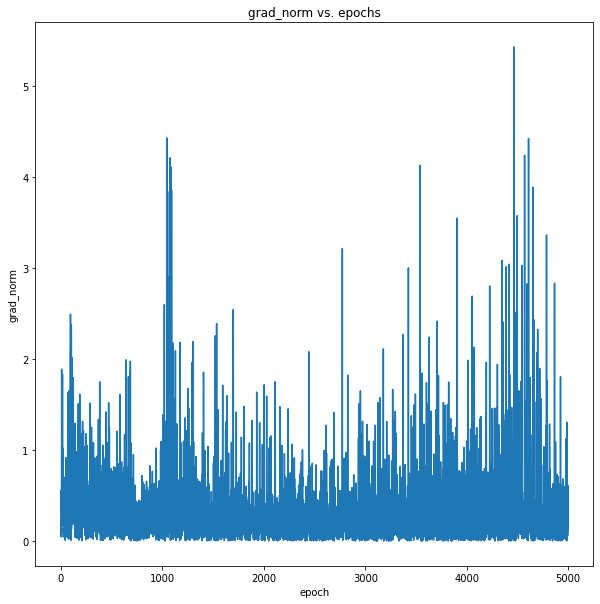

In [36]:
plt.figure(figsize=(10,10))
plt.plot(g0.values())
plt.xlabel('epoch')
plt.ylabel('grad_norm')
plt.title('grad_norm vs. epochs');

plt.savefig("model0_afterstep.jpg")

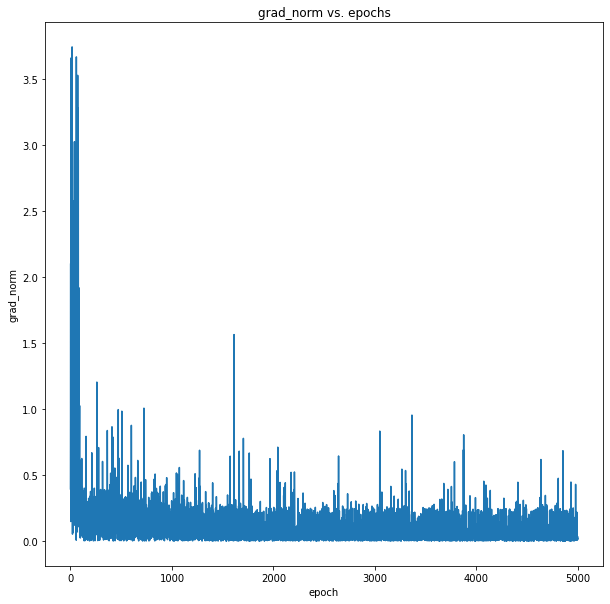

In [34]:
plt.figure(figsize=(10,10))
plt.plot(g1.values())
plt.xlabel('epoch')
plt.ylabel('grad_norm')
plt.title('grad_norm vs. epochs');

plt.savefig("Model1"+name)

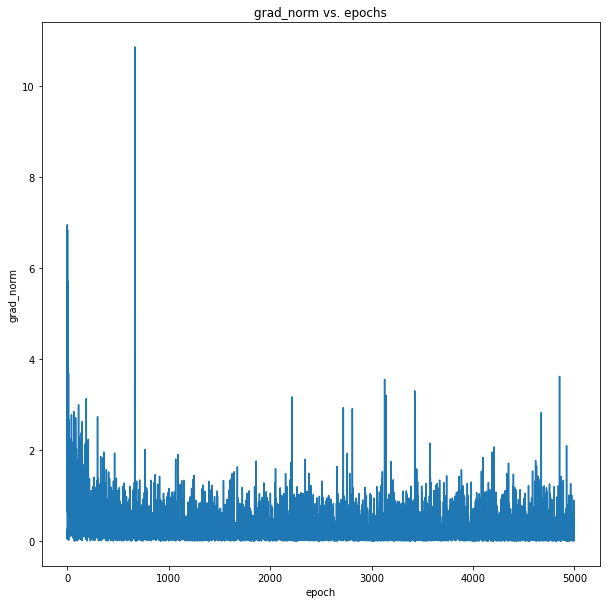

In [35]:
plt.figure(figsize=(10,10))
plt.plot(g2.values())
plt.xlabel('epoch')
plt.ylabel('grad_norm')
plt.title('grad_norm vs. epochs');

plt.savefig("Model2"+name)

In [28]:
# g0,g1,g2
g0,g1,g2

({0: 0.33748737719117744,
  1: 0.3651247834469602,
  2: 0.5601432442564582,
  3: 0.04545136153493815,
  4: 0.15487616980804117,
  5: 0.17819891434336194,
  6: 0.20968082922881176,
  7: 0.6779903777523791,
  8: 1.8862305046506407,
  9: 0.6976024355381495,
  10: 0.5420399273620777,
  11: 0.16813296862768762,
  12: 0.6593513987055998,
  13: 0.4120411693960091,
  14: 0.36502437530677967,
  15: 0.3668170753047953,
  16: 1.8320093517323133,
  17: 0.3652264933611048,
  18: 0.5363512858618148,
  19: 0.26173200133529073,
  20: 0.37397139956248304,
  21: 1.0188388099662171,
  22: 0.39667007433077994,
  23: 0.691351894749326,
  24: 0.9469761477371091,
  25: 0.04571948919533037,
  26: 0.1433460814997692,
  27: 0.08971831900153479,
  28: 0.4254640361696442,
  29: 0.10624128872651999,
  30: 0.2842224734723163,
  31: 0.14566813660083625,
  32: 0.34260778067941505,
  33: 0.394057782630817,
  34: 0.686646848746156,
  35: 0.19282701275535746,
  36: 0.11426357999384651,
  37: 0.7007381773447672,
  38: 0.

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(val_losses_0_div_100)
plt.plot(val_losses_1_div_100)
plt.plot(val_losses_2_div_100)
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.legend(['Model 0','Model 1','Model 2'])
plt.title('val_loss vs. epochs');

plt.savefig("loss_"+filename)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(X,Y)
plt.plot(X,model_0(X).detach().numpy())
plt.plot(X,model_1(X).detach().numpy())
plt.plot(X,model_2(X).detach().numpy())

plt.xlabel('X- Independent Variable')
plt.ylabel('Original/prdicted Value')
plt.legend(['sin(5pix)/5pix','Model 0','Model 1','Model 2'])
plt.savefig("prediction_"+filename)

In [ ]:
# code for Traning accuracy left

In [ ]:
def accuracy(model,X,Y):
    _,preds = torch.max(model(X),dim=1)
    
    return torch.sum(preds == Y).item() / len(preds)

In [ ]:
accuracy(model_0,X,Y)

In [ ]:
accuracy(model_1,X,Y)

In [ ]:
accuracy(model_2,X,Y)

In [ ]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

In [ ]:
get_n_params(model_0)

In [ ]:
get_n_params(model_1)

In [ ]:
get_n_params(model_2)